Text(0, 0.5, 'Balancing Error')

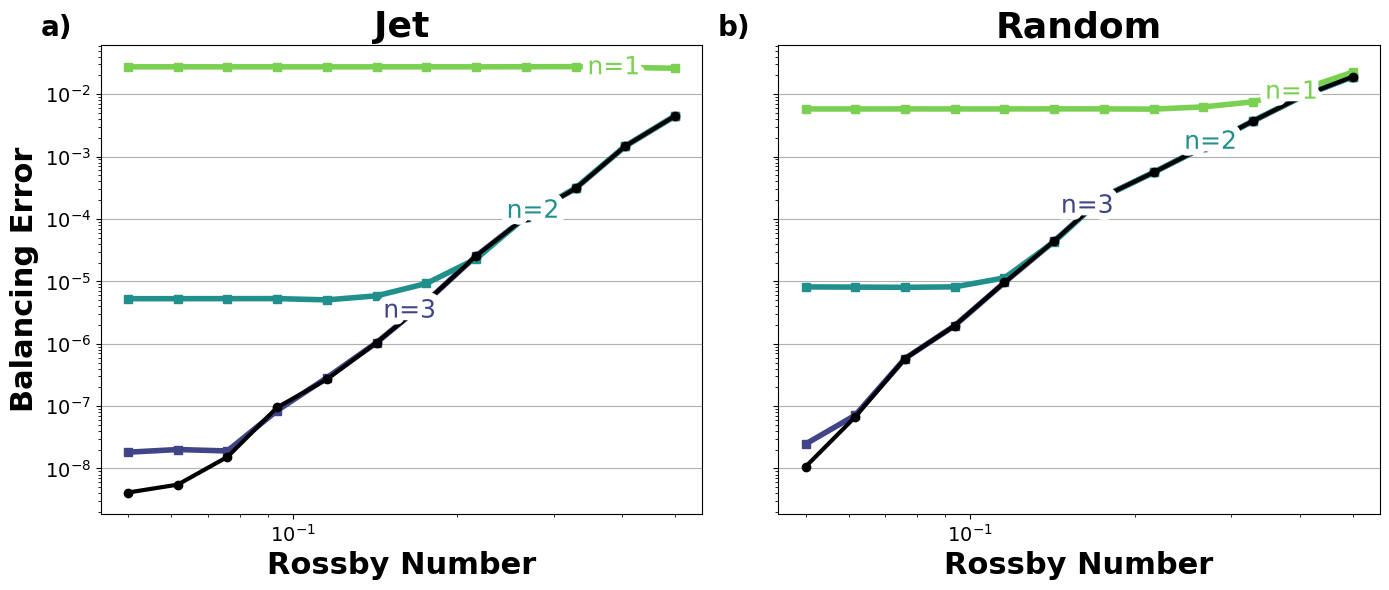

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

ds = xr.load_dataset("../data/rossby_number_sw.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(ds.number_chunks)))[::-1]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])


fig, axs = plt.subplots(1, 2, figsize=(14,6), tight_layout=True, sharey=True)

for ax, ic in zip(axs, ds.initial_condition):

    # OBTA with base point recalculation
    for n_chunks, color in zip(ds.number_chunks[::-1], colors):
        ds.sel({"initial_condition": ic,
                "number_chunks": n_chunks,
                "balancing_method": "obta"}).imbalance.plot(
                    ax=ax, marker="s", color=color, lw=4, label=f"n={int(n_chunks)}",
                )

    # # Create inline labels
    labelLines(ax.get_lines(), zorder=2.5, align=False,
            fontsize=18, outline_width=10)

    # OB
    ds.sel({"initial_condition": ic,
            "number_chunks":1,
            "balancing_method": "ob"}).imbalance.plot(
                ax=ax, marker="o", color="black", lw=3,
            )

    # # create a custom legend
    # custom_lines = [Line2D([0], [0], color=colors[0], lw=2, linestyle="--", marker="x"),
    #                 Line2D([0], [0], color=colors[1], lw=4, marker="s"),
    #                 Line2D([0], [0], color="black", lw=3, marker="o")]
    # leg = ax.legend(custom_lines,
    #                 [r"OBTA$^{2\rightarrow5}$", "OBTA", "OB"],
    #                 loc="lower left",
    #                 frameon=True,
    #                 prop={"size":"xx-large"})
    # leg.get_frame().set_linewidth(0)
    # leg.get_frame().set_facecolor("white")

    ax.tick_params(labelsize=14)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_title(ic.item().capitalize(), fontsize=26, fontweight="bold")
    ax.set_xlabel("Rossby Number", fontsize=22, fontweight="bold")
    ax.set_ylabel("")

    # Create a, b labels
    ax.text(-0.1, 1.02, next(labels), transform=ax.transAxes,
            fontsize=20, fontweight="bold")

axs[0].set_ylabel("Balancing Error", fontsize=22, fontweight="bold")


# plt.savefig(f"../figures/ob_vs_obta_ro{ro:.2g}.png", dpi=200)

Text(0, 0.5, 'Imbalance')

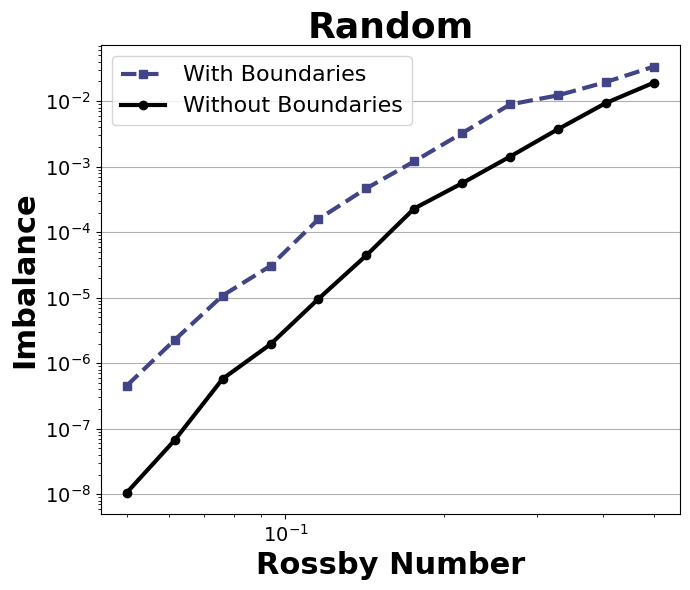

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

ds = xr.load_dataset("../data/rossby_number_sw.nc", decode_timedelta=False)
dsb = xr.load_dataset("../data/rossby_number_bound_sw.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(ds.number_chunks)))[::-1]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])


fig, ax = plt.subplots(1, 1, figsize=(7,6), tight_layout=True)


# With boundaries
dsb.imbalance.plot(
            ax=ax, marker="s", color=colors[0], lw=3, linestyle="--",
            label="With Boundaries",
        )

# No boundaries
ds.sel({"initial_condition": "random",
        "number_chunks":1,
        "balancing_method": "ob"}).imbalance.plot(
            ax=ax, marker="o", color="black", lw=3, label="Without Boundaries",
        )

ax.legend(fontsize=16, frameon=True)
ax.tick_params(labelsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(axis="y")
ax.set_title(ic.item().capitalize(), fontsize=26, fontweight="bold")
ax.set_xlabel("Rossby Number", fontsize=22, fontweight="bold")
ax.set_ylabel("Imbalance", fontsize=22, fontweight="bold")


# plt.savefig(f"../figures/ob_vs_obta_ro{ro:.2g}.png", dpi=200)